### Question 1

In [46]:
!pip install shap

   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ---------------------------------------- 547.8/547.8 kB 1.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [51]:
# Load the dataset and provide the structural metadata and summary statistics of the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipelineimport
import joblib
import shap



warnings.filterwarnings('ignore')


In [52]:
df = pd.read_csv("Loan Status Prediction (1).csv")

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
shape = df.shape
shape

(614, 13)

In [55]:
# summary statistics of the dataset

discription = df.describe()
discription

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
# summary statistics for categorical variables


discription2 = df.describe(include='object')
discription2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [57]:
# structural metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [58]:
#  calculate skewness, kurtosis values and draw the histograms


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness and kurtosis
skew_vals = df[numerical_cols].skew()
kurt_vals = df[numerical_cols].kurt()

print("Skewness Values:")
print(skew_vals)
print("\nKurtosis Values:")
print(kurt_vals)


Skewness Values:
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Kurtosis Values:
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64


### Summary of Skewness

* Income-related features (ApplicantIncome, CoapplicantIncome) are highly right-skewed because most applicants earn modest incomes while a few have exceptionally high income.

* LoanAmount is also right-skewed, indicating most people borrow smaller loan sizes.

* Loan_Amount_Term and Credit_History are left-skewed because most applicants use typical loan durations and have credit history = 1.
                                                                                                                                

### Summary of Kurtosis

* The income variables have extremely high kurtosis → they contain many outliers and a sharp peak.

* LoanAmount also contains outliers, though less extreme.

* Loan_Amount_Term shows some outliers.

* Credit_History behaves more like a binary categorical feature, so kurtosis has less meaning.

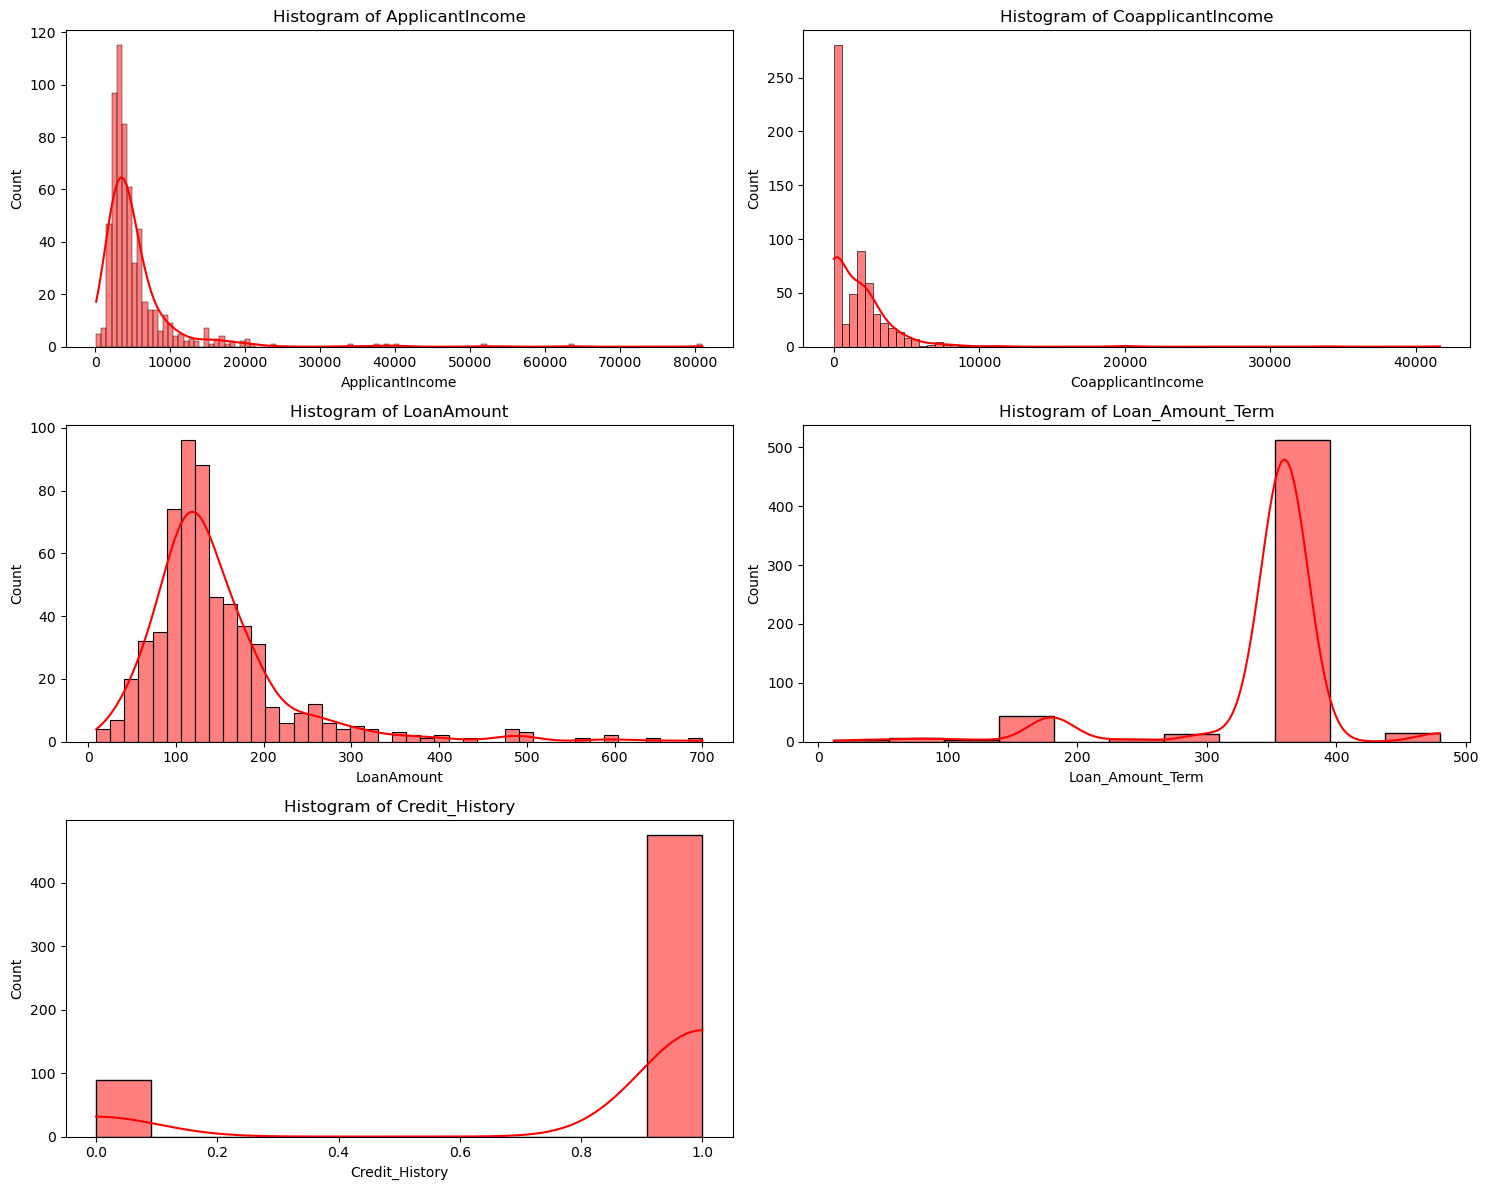

In [59]:
# Plot histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)
    sns.histplot(df[col], kde=True, color = "red")
    plt.title(f'Histogram of {col}')
plt.tight_layout();

plt.savefig('kurtosis and skewness.png', dpi = 100)

### Question 2

In [60]:
# finding missing values as oercentage of the entire data set


missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values (%):")
missing_percentage


Missing Values (%):


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [61]:
 df["Dependents"].unique()
df["Dependents"] = df["Dependents"].replace({'3+': 3})

In [62]:
# replacing the missining values of categorical values


df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# replacing the missining values of numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [63]:
df.shape

(614, 13)

In [64]:
# Useing Inter Quatile Range to identify number of outliers as percentage of total dataset

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_percentages = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage = (len(outliers) / len(df)) * 100
    outlier_percentages[col] = percentage

print("Outlier Percentage (IQR Method):")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}%")

Outlier Percentage (IQR Method):
ApplicantIncome: 8.14%
CoapplicantIncome: 2.93%
LoanAmount: 6.68%
Loan_Amount_Term: 16.61%
Credit_History: 22.64%


### Reason for Choosing IQR Instead of Z-score

I chose the IQR (Interquartile Range) method for detecting outliers because the numerical features in this dataset are highly skewed. From the earlier skewness results:

* ApplicantIncome: 6.54

* CoapplicantIncome: 7.49

* LoanAmount: 2.68

These are far from normally distributed.

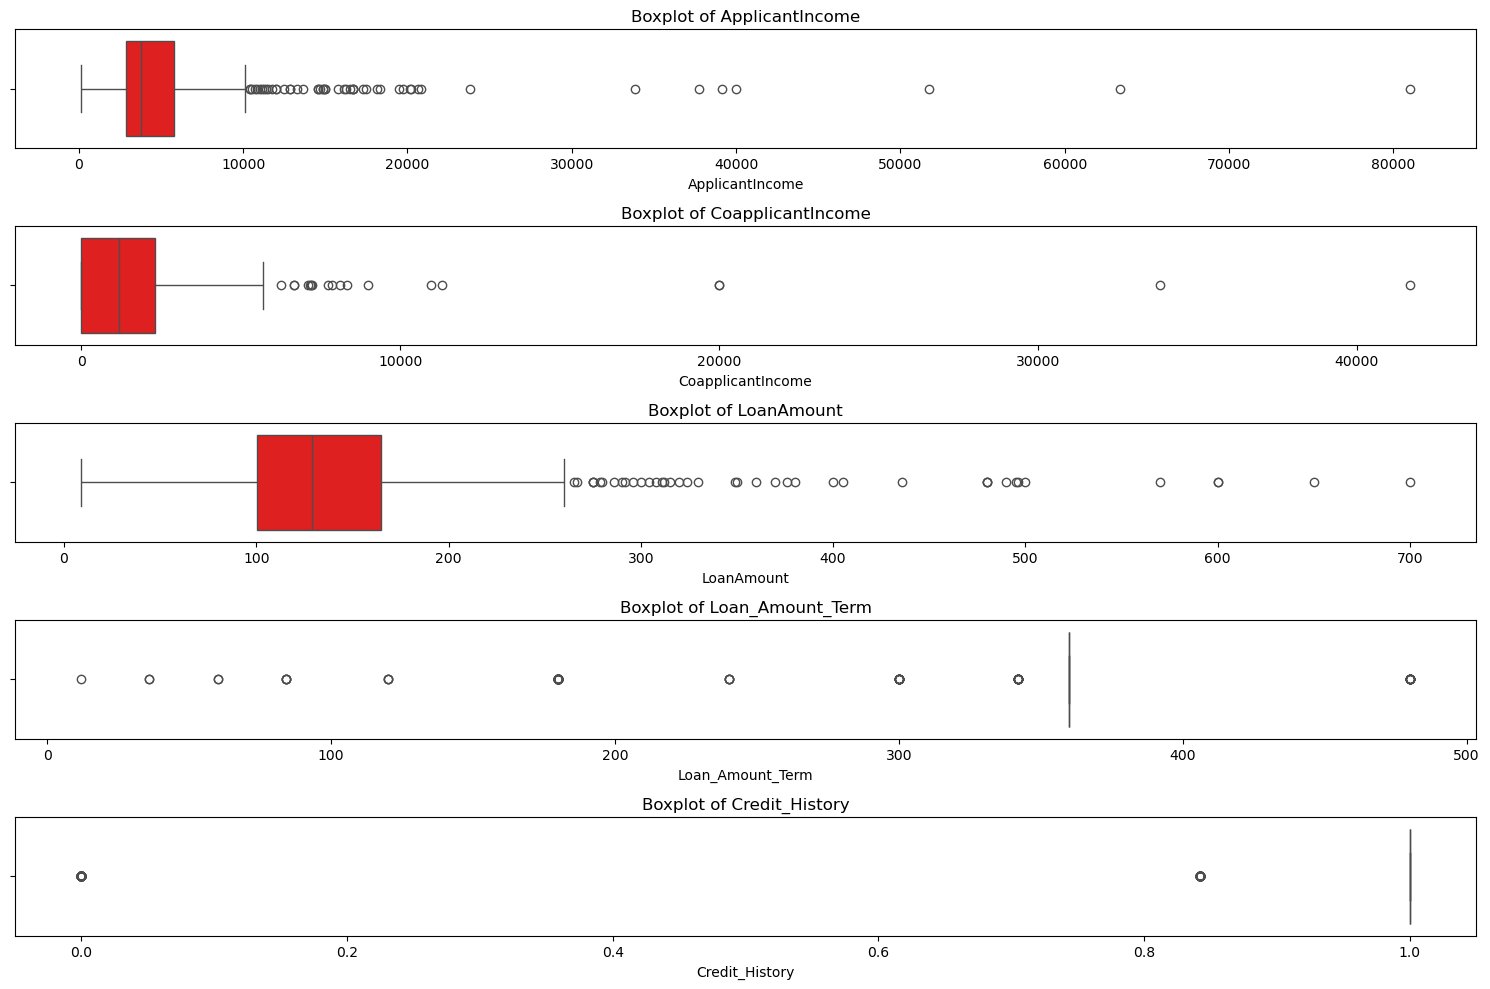

<Figure size 640x480 with 0 Axes>

In [65]:
# boxplot of the numerical variables


plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x = df[col], color = "red")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

plt.savefig('boxplot before removing outliers', dpi = 100)

In [66]:
cols_to_clean = ['Credit_History', 'Loan_Amount_Term', 'ApplicantIncome']

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


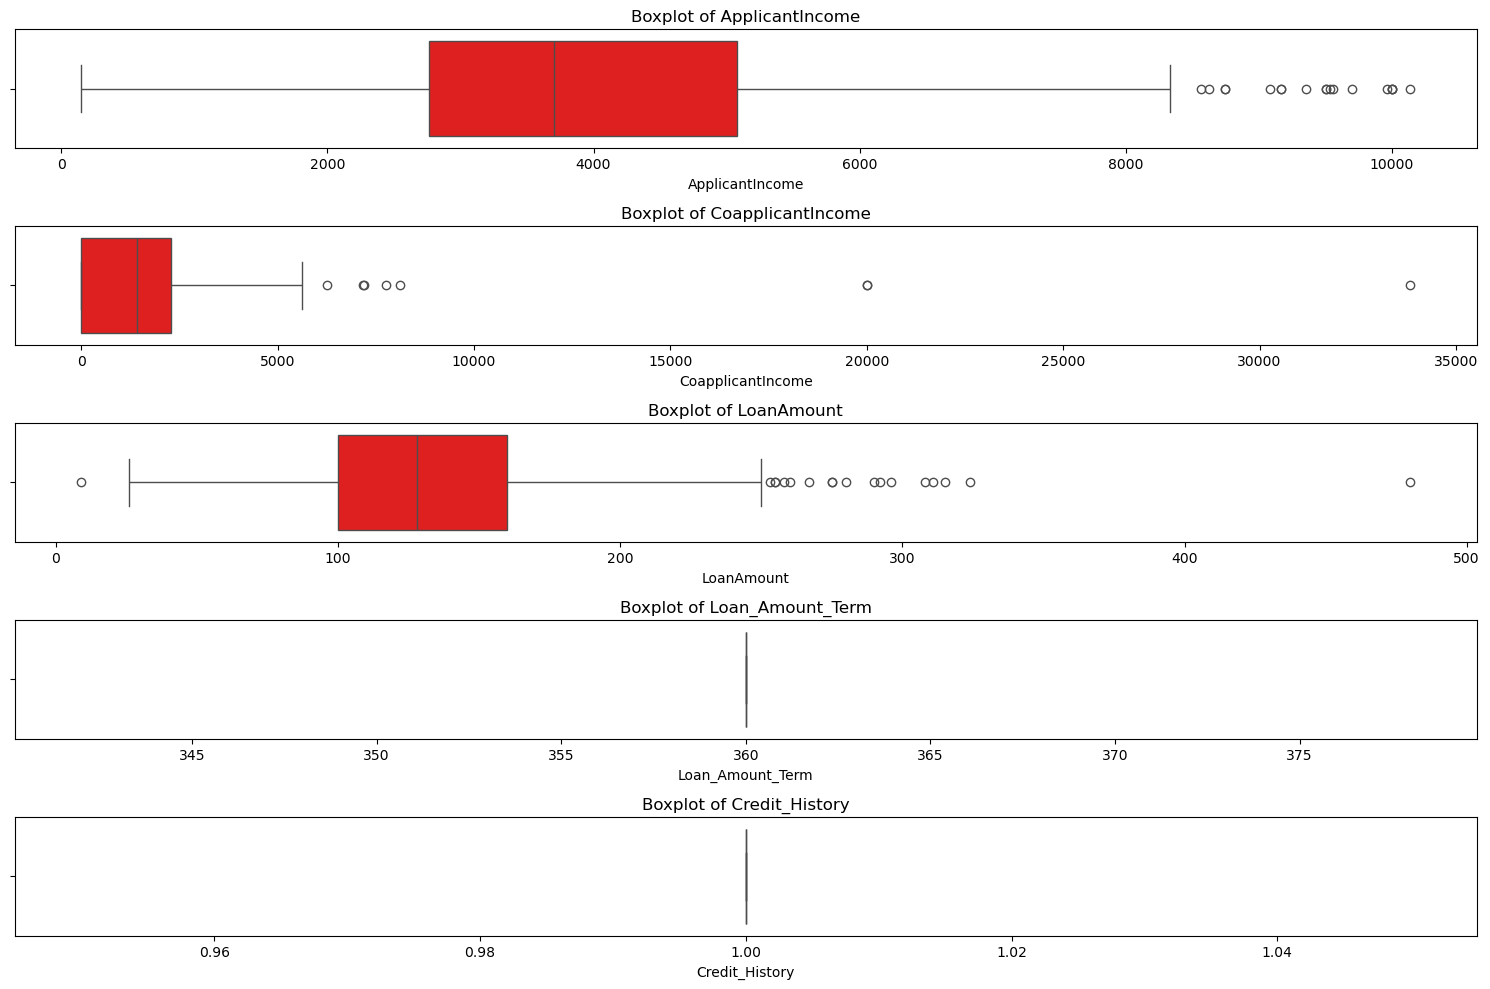

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x = df[col], color = "red")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

plt.savefig('boxplot after removing outliers', dpi = 100)

### Question 3

In [68]:
# adding two new features

df['TotalIncome'] = (df['ApplicantIncome'] + df['CoapplicantIncome']).round(2)
df['LoanAmountPerIncome'] = (df['LoanAmount'] / df['TotalIncome']).round(2)


In [69]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmountPerIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,0.03
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,0.02
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.02
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,0.02
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,0.02


In [70]:
# transforming the skewed dataset

df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome']).round(2)
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome']).round(2)
df['LoanAmount_log'] = np.log1p(df['LoanAmount']).round(2)

In [71]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmountPerIncome,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,0.03,8.67,0.00,4.99
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,0.02,8.43,7.32,4.86
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.02,8.01,0.00,4.20
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,0.02,7.86,7.77,4.80
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,0.02,8.70,0.00,4.96


In [72]:
# One-hot encoding for nominal variables
cols = ['Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_Yes']

df = pd.get_dummies(df, columns=['Gender', 'Married', 'Property_Area', 'Self_Employed'], drop_first=True)

df[cols] = df[cols].astype(int)

# Label encoding for ordinal categories
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])


In [73]:
df.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmountPerIncome,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,Y,5849.0,0.03,8.67,0.00,4.99,1,0,0,1,0
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,N,6091.0,0.02,8.43,7.32,4.86,1,1,0,0,0
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,Y,3000.0,0.02,8.01,0.00,4.20,1,1,0,1,1
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,Y,4941.0,0.02,7.86,7.77,4.80,1,1,0,1,0
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,Y,6000.0,0.02,8.70,0.00,4.96,1,0,0,1,0


In [74]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

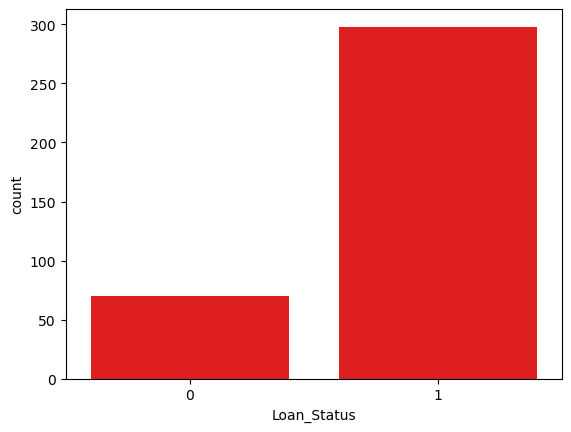

In [75]:
sns.barplot(df['Loan_Status'].value_counts(), color = 'red');

plt.savefig('barplot for frequency distribution', dpi = 100)

In [76]:
y_data = df['Loan_Status']
df = df.drop(['Loan_ID', 'Loan_Status'], axis = 1)


In [77]:
corr = df.corr()
corr

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmountPerIncome,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
Dependents,1.000000,0.049362,0.156996,-0.013199,0.161527,NaN,NaN,0.091309,0.042113,0.145613,-0.007075,0.157247,0.172283,0.347556,-0.004159,0.025692,0.116433
Education,0.049362,1.000000,-0.156467,-0.091836,-0.192008,NaN,NaN,-0.184932,0.055146,-0.144849,-0.001493,-0.156342,0.012886,-0.019744,-0.044548,-0.112551,0.012516
ApplicantIncome,0.156996,-0.156467,1.000000,-0.197242,0.525549,NaN,NaN,0.480356,-0.187465,0.914229,-0.357262,0.471505,0.042024,-0.057158,0.004686,-0.085147,0.221512
CoapplicantIncome,-0.013199,-0.091836,-0.197242,1.000000,0.222665,NaN,NaN,0.765097,-0.263243,-0.212472,0.580518,0.203007,0.180761,0.095796,-0.034267,0.036885,0.009731
LoanAmount,0.161527,-0.192008,0.525549,0.222665,1.000000,NaN,NaN,0.544398,0.291705,0.445359,0.189413,0.925673,0.172589,0.166794,-0.001924,-0.077657,0.161029
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalIncome,0.091309,-0.184932,0.480356,0.765097,0.544398,NaN,NaN,1.000000,-0.358641,0.410395,0.284703,0.491313,0.189319,0.048161,-0.027579,-0.022927,0.154199
LoanAmountPerIncome,0.042113,0.055146,-0.187465,-0.263243,0.291705,NaN,NaN,-0.358641,1.000000,-0.241596,-0.133724,0.363500,-0.109032,0.035463,-0.028709,0.001985,-0.050946
ApplicantIncome_log,0.145613,-0.144849,0.914229,-0.212472,0.445359,NaN,NaN,0.410395,-0.241596,1.000000,-0.349259,0.410156,0.048758,-0.081090,0.027258,-0.075433,0.153875


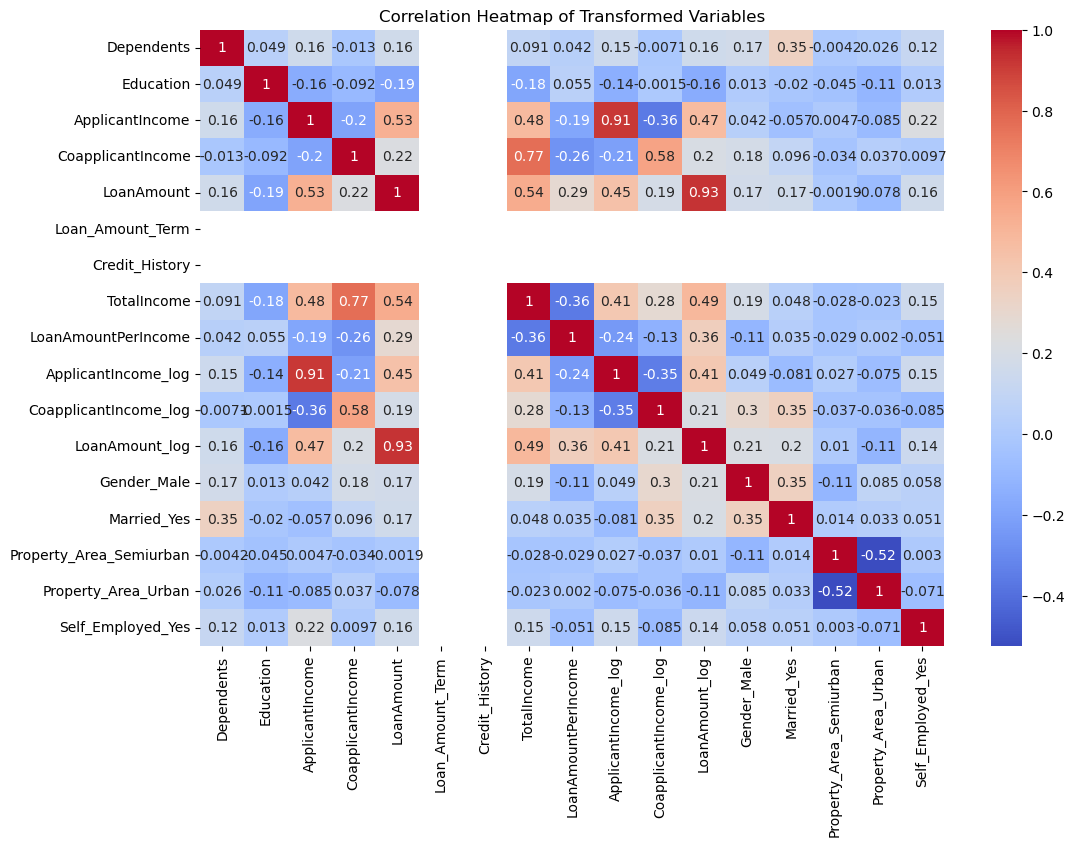

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Transformed Variables")
plt.show()

plt.savefig('heatmap before removing unwanted fields', dpi = 100)

In [79]:
data = df.copy()

In [80]:
df.shape

(368, 17)

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df = scaler.fit_transform(df)


In [32]:
df.shape

(368, 17)

### Question 4

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df, y_data, test_size = 0.3, random_state = 42)

# Tackling the problem of imbalance smote was employed for oversampling

In [35]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [36]:
# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Train models
logreg.fit(x_train, y_train)
svc.fit(x_train, y_train)
sgd.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [37]:
logreg

LogisticRegression(max_iter=1000, random_state=42)

In [38]:
svc

SVC(kernel='linear', probability=True, random_state=42)

In [39]:
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(svc, 'SVC_model.pkl')
joblib.dump(sgd, 'SGD_model.pkl')

['SGD_model.pkl']

In [40]:
y_pred_lr = logreg.predict(x_test)
print(f"Accuracy for Logistic Regression is: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision for Logistic Regression is: {precision_score(y_test, y_pred_lr)}")
print(f"F1 score for Logistic Regression is: {f1_score(y_test, y_pred_lr)}")

Accuracy for Logistic Regression is: 0.6486486486486487
Precision for Logistic Regression is: 0.8289473684210527
F1 score for Logistic Regression is: 0.7636363636363637


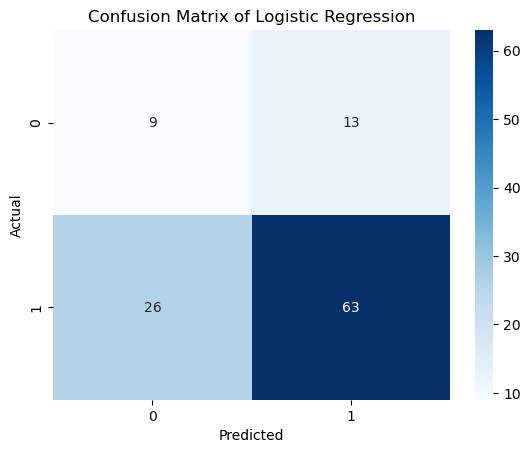

<Figure size 640x480 with 0 Axes>

In [41]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion metrics of logistix regression', dpi = 100)

In [42]:
y_pred_svc = svc.predict(x_test)
print(f"Accuracy for SVC is: {accuracy_score(y_test, y_pred_svc)}")
print(f"Precision for SVC is: {precision_score(y_test, y_pred_svc)}")
print(f"F1 score for SVC is: {f1_score(y_test, y_pred_svc)}")

Accuracy for SVC is: 0.6576576576576577
Precision for SVC is: 0.8591549295774648
F1 score for SVC is: 0.7625


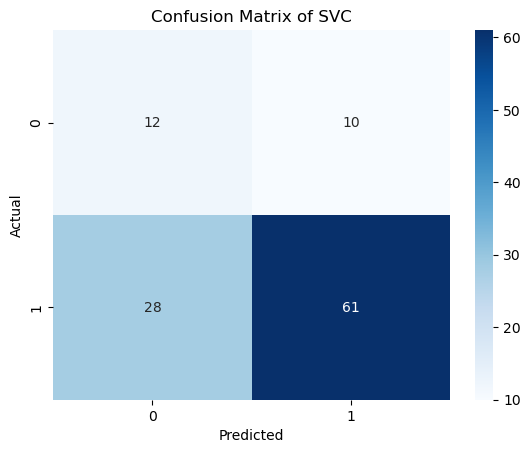

<Figure size 640x480 with 0 Axes>

In [44]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix of SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion metrics of svc', dpi = 100)

In [45]:
y_pred_sgd = sgd.predict(x_test)
print(f"Accuracy for SGD Classifier is: {accuracy_score(y_test, y_pred_sgd)}")
print(f"Precision for SGD Classifier is: {precision_score(y_test, y_pred_sgd)}")
print(f"F1 score for SGD Classifier is: {f1_score(y_test, y_pred_sgd)}")

Accuracy for SGD Classifier is: 0.40540540540540543
Precision for SGD Classifier is: 0.7804878048780488
F1 score for SGD Classifier is: 0.49230769230769234


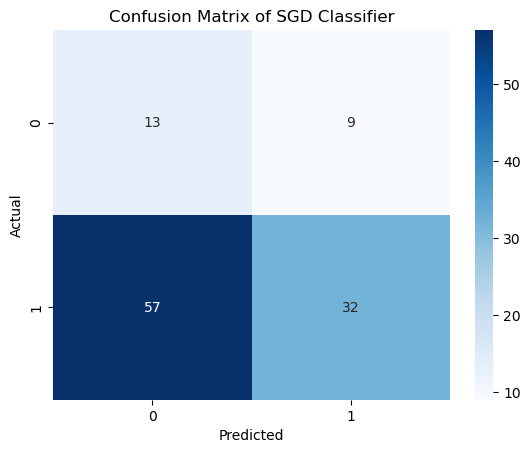

<Figure size 640x480 with 0 Axes>

In [46]:
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix of SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion metrics of SGD', dpi = 100)

# Best Performing Model

From the observations, the Support Vector Classifier (SVC) is the best-performing model, achieving an accuracy of 0.658, precision of 0.859, and an F1 score of 0.763.

## Explanation

The SVC model outperforms the other linear models because of its ability to find an optimal decision boundary that maximizes the margin between classes. This makes SVC particularly effective when the dataset is not perfectly linearly separable, allowing it to generalize better to unseen data.

Its high precision indicates that the model is especially effective at correctly identifying positive loan approvals with few false positives. The strong F1 score shows that it maintains a good balance between precision and recall, making it reliable even on potentially imbalanced data.

Overall, SVC provides the best trade-off between accuracy, precision, and F1 score, making it the most suitable model for this loan approval prediction task compared to Logistic Regression and SGDClassifier.

### Question 5

### the code below is meant to Identify which features most influence predictions overall.

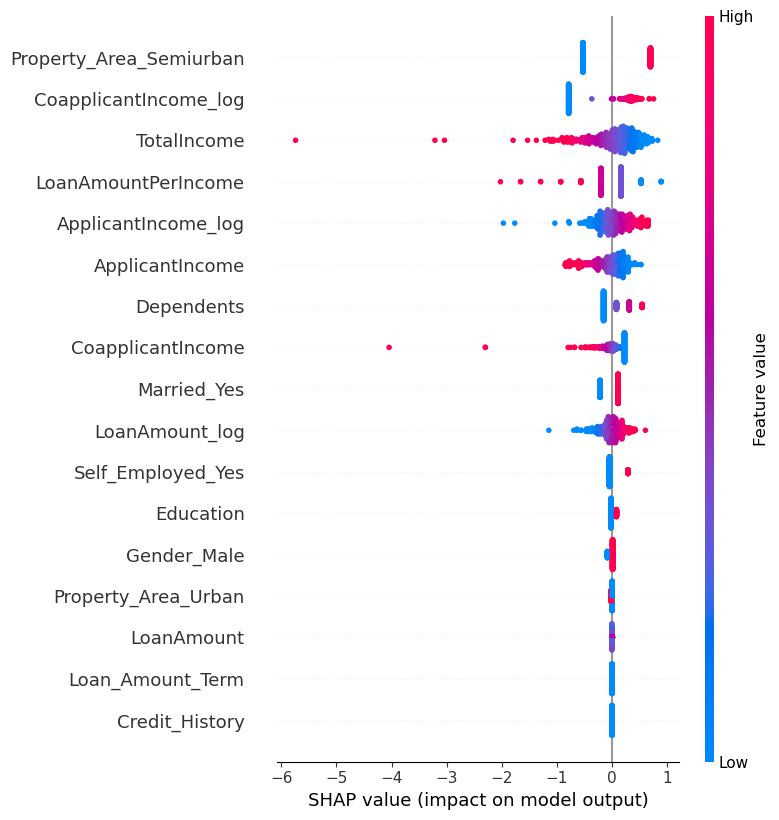

<Figure size 640x480 with 0 Axes>

In [47]:
shap.initjs()

X_scaled_df = pd.DataFrame(df, columns=data.columns, index=data.index)


explainer = shap.LinearExplainer(logreg, X_scaled_df, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_scaled_df)

# Global summary plot
shap.summary_plot(shap_values, X_scaled_df)
plt.savefig("global_summary.png", dpi=300, bbox_inches='tight')


# Individual prediction explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_scaled_df.iloc[0,:])

In [81]:
data['Dependents'] = data['Dependents'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.3, random_state = 42, stratify=y_data)

In [82]:
col = ['Dependents', 'Education', 'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_Yes']

### Bias Analysis by Employment Type

We split the test set into two groups: Self-Employed and Salaried.  
SHAP values are computed for each group to compare how features affect loan approval predictions differently.


In [83]:

x_train_cat = df[cols].loc[x_train.index]
x_test_cat  = df[cols].loc[x_test.index]

group1_idx = x_test_cat[x_test_cat["Self_Employed_Yes"] == 0].index
group2_idx = x_test_cat[x_test_cat["Self_Employed_Yes"] == 1].index

# Now select rows from scaled+encoded test set
group1_scaled = x_test.loc[group1_idx]
group2_scaled = x_test.loc[group2_idx]

# Select corresponding rows from the scaled + encoded DataFrame
shap_values_group1 = explainer.shap_values(group1_scaled)
shap_values_group2 = explainer.shap_values(group2_scaled)

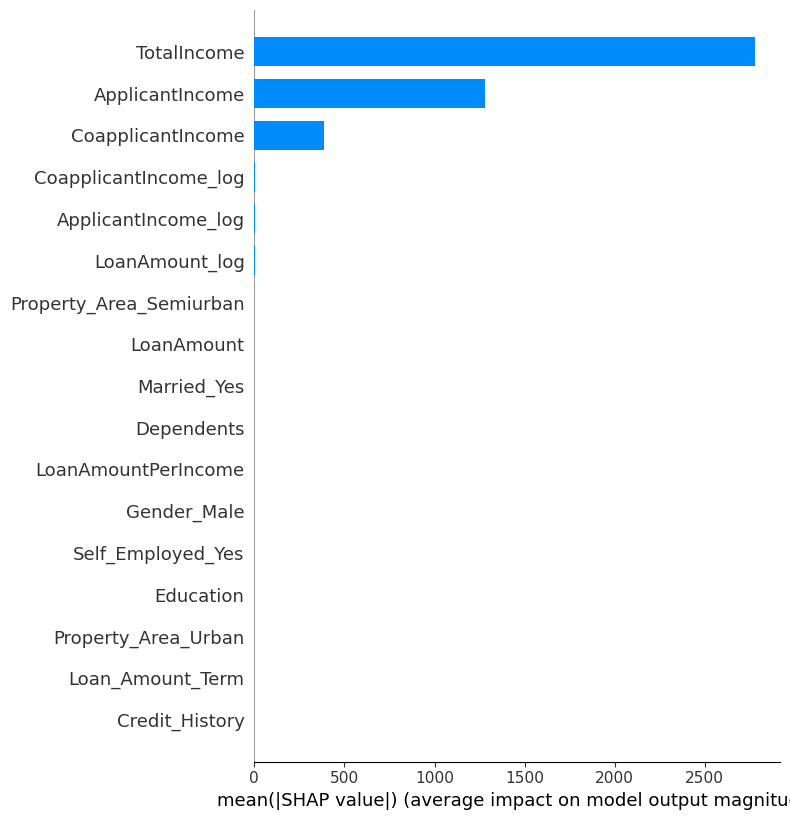

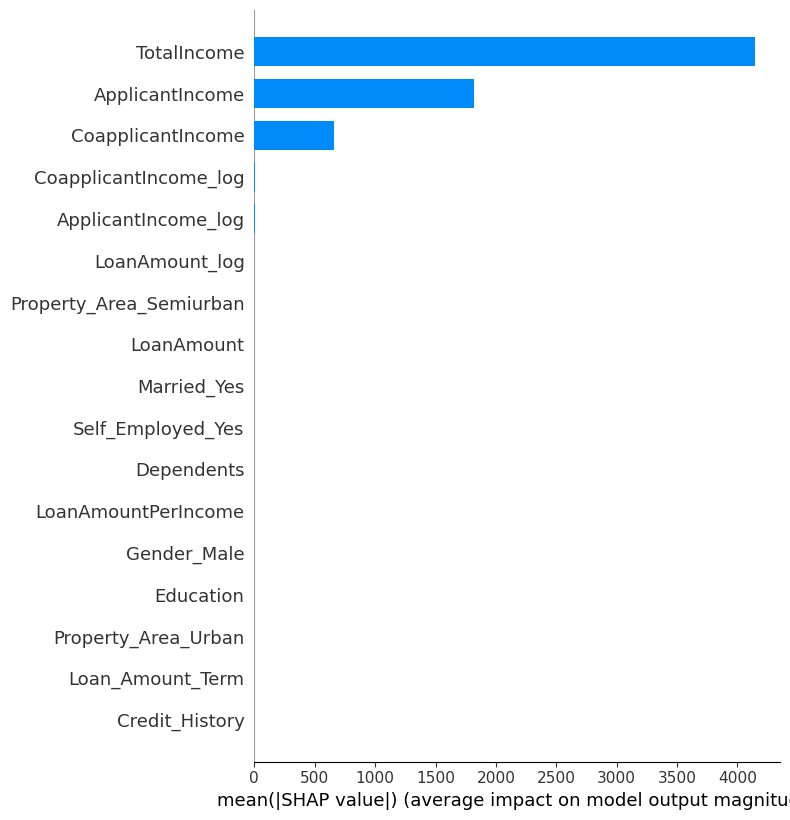

<Figure size 640x480 with 0 Axes>

In [84]:
# Summary plot for group1
shap.summary_plot(shap_values_group1, group1_scaled, plot_type="bar", show=True)
plt.savefig("shap_summary_group1.png", dpi=100, bbox_inches='tight')

# Summary plot for group2
shap.summary_plot(shap_values_group2, group2_scaled, plot_type="bar", show=True)
plt.savefig("shap_summary_group2.png", dpi=100, bbox_inches='tight')


# the above image shows the fields thats drive loan disburstments